## Run with YOLO

- yolov5: https://pytorch.org/hub/ultralytics_yolov5/
- yolov8: https://github.com/ultralytics/ultralytics, https://docs.ultralytics.com/modes/predict/

In [1]:
import torch
model1 = torch.hub.load("ultralytics/yolov5", "yolov5s", pretrained=True, verbose=False)


from ultralytics import YOLO
model2 = YOLO("yolov8n.pt") 

YOLOv5 🚀 2022-12-28 Python-3.8.12 torch-1.13.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [2]:
results = model2("https://ultralytics.com/images/bus.jpg")

result = results[0]
boxes = [list(map(int, xyxy)) for xyxy in result.boxes.xyxy]
classes = [result.names[int(i)] for i in result.boxes.cls]
scores = result.boxes.conf.tolist()
print(boxes, classes, scores)

Ultralytics YOLOv8.0.48 🚀 Python-3.8.12 torch-1.13.1 CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /Users/chenshiyu/workspace/git/towhee/jupyter/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 67.5ms
Speed: 1.5ms preprocess, 67.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


[[17, 231, 802, 768], [49, 399, 245, 903], [670, 380, 810, 876], [221, 406, 345, 857], [0, 255, 32, 325], [0, 551, 67, 874]] ['bus', 'person', 'person', 'person', 'stop sign', 'person'] [0.8705446124076843, 0.8689801692962646, 0.8536036610603333, 0.8193051218986511, 0.34606924653053284, 0.301294207572937]


In [3]:
results = model1("https://ultralytics.com/images/bus.jpg")
boxes = [re[0:4] for re in results.xyxy[0]]
boxes = [list(map(int, box)) for box in boxes]
classes = list(results.pandas().xyxy[0].name)
scores = list(results.pandas().xyxy[0].confidence)
print(boxes, classes, scores)

[[671, 395, 810, 878], [220, 408, 346, 867], [49, 389, 247, 912], [12, 223, 809, 789], [0, 552, 67, 875]] ['person', 'person', 'person', 'bus', 'person'] [0.8966755867004395, 0.8693942427635193, 0.850602388381958, 0.8504517078399658, 0.5373987555503845]


## Develop yolo operator

- yolov5 op: https://towhee.io/object-detection/yolov5
- yolo op which can specific the model, suchas the model(https://github.com/ultralytics/assets/releases)

In [4]:
from towhee import pipe, ops, DataCollection

p = (
    pipe.input('path')
        .map('path', 'img', ops.image_decode.cv2_rgb())
        .map('img', ('box', 'class', 'score'), ops.object_detection.yolov5())
        .map(('img', 'box'), 'object', ops.image_crop(clamp=True))
        .output('img', 'object', 'class')
)

Using cache found in /Users/chenshiyu/.cache/torch/hub/ultralytics_yolov5_master


img,object,class
,,person person person bus person

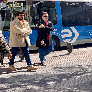
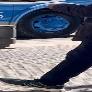
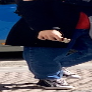
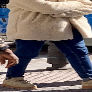
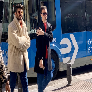
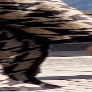

In [5]:
DataCollection(p("https://ultralytics.com/images/bus.jpg")).show()

In [6]:
from towhee import pipe, ops, DataCollection

p = (
    pipe.input('path')
        .map('path', 'img', ops.image_decode.cv2_rgb())
        .map('img', ('box', 'class', 'score'), ops.object_detection.yolo(model="yolov8n.pt"))
#         .map('img', ('box', 'class', 'score'), ops.object_detection.yolov5())
        .map(('img', 'box'), 'object', ops.image_crop(clamp=True))
        .output('img', 'object', 'class')
)

Ultralytics YOLOv8.0.48 🚀 Python-3.8.12 torch-1.13.1 CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

0: 640x480 4 persons, 1 bus, 65.2ms
Speed: 1.1ms preprocess, 65.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


img,object,class
,,person person bus person person

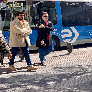
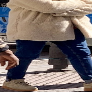
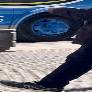
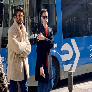
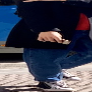
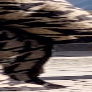

In [7]:
DataCollection(p("https://ultralytics.com/images/bus.jpg")).show()

## Set for training

> `makir dataset` in '..'

- yolo train: https://github.com/ultralytics/ultralytics/blob/dce4efce48a05e028e6ec430045431c242e52484/docs/yolov5/tutorials/train_custom_data.md

In [1]:
import towhee

op = towhee.ops.object_detection.yolo().get_op()

In [4]:
op._model.train(data="coco128.yaml", epochs=3)

New https://pypi.org/project/ultralytics/8.0.100 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.48 🚀 Python-3.8.12 torch-1.13.1 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=t

                   dog        128          9      0.556      0.778      0.803      0.578
                 horse        128          2      0.688          1      0.995      0.484
              elephant        128         17      0.773      0.941      0.942      0.751
                  bear        128          1      0.537          1      0.995      0.995
                 zebra        128          4      0.861          1      0.995      0.965
               giraffe        128          9      0.781          1      0.973      0.708
              backpack        128          6      0.648      0.333      0.467      0.263
              umbrella        128         18      0.658      0.535      0.689      0.453
               handbag        128         19          1      0.117       0.27      0.149
                   tie        128          7      0.775      0.714      0.739      0.518
              suitcase        128          4      0.773      0.864      0.895      0.569
               frisbe